# Importações

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import plotly.express as px
from sqlalchemy import create_engine


# Conexão ao PostgreSQl

### Dados de meterology

In [2]:
#user = "avnadmin"
#password = "AVNS_9fZb3BkX9qGXxKpxsrZ"
#host = "postgresql-iscac.f.aivencloud.com"
#port = "25674"
#bucket = "Seasonality"

bucket = 'Seasonality'
user = 'postgres'
password = 'postgres'
host = 'localhost'
port = 5432

# URL de conexão com PostgreSQL
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{bucket}')

#Nome da tabela 
meteorology ='meteorology'

### Dados de bicycle

In [ ]:
# user = "avnadmin"
# password = "AVNS_9fZb3BkX9qGXxKpxsrZ"
# host = "postgresql-iscac.f.aivencloud.com"
# port = "25674"
# bucket = "Seasonality"

# # URL de conexão com PostgreSQL
# engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{bucket}')

# #Nome da tabela 
# meteorology ='bicycle_counter'

# Importar dados do PostgreSQl

### Dados de meterology

In [3]:
try:
    # Ler os dados da tabela no DataFrame
    df_meterology = pd.read_sql(f"SELECT * FROM {meteorology}", con=engine)
    
    # Exibir as duas primeiras colunas
    print(df_meterology.head())  # Seleciona apenas as duas primeiras colunas e mostra as 5 primeiras linhas
except Exception as e:
    print(f"Erro ao importar os dados: {e}")

             datetime  temp  feelslike   dew  humidity  precip  precipprob  \
0 2021-08-01 00:00:00  17.6       17.6  11.7     68.28     0.0         0.0   
1 2021-08-01 01:00:00  17.5       17.5  12.6     72.76     0.0         0.0   
2 2021-08-01 02:00:00  17.1       17.1  12.7     75.04     0.0         0.0   
3 2021-08-01 03:00:00  17.1       17.1  12.7     74.99     0.0         0.0   
4 2021-08-01 04:00:00  17.0       17.0  12.4     74.15     0.0         0.0   

  preciptype  windgust  windspeed  winddir  sealevelpressure  cloudcover  \
0       None       NaN       24.9    339.0            1020.7         NaN   
1       None       NaN       18.0    340.0            1020.7         0.0   
2       None       NaN       17.9    330.0            1020.0         NaN   
3       None       NaN       11.0    330.0            1019.9        30.0   
4       None       NaN        7.6    350.0            1019.5        10.0   

   visibility        conditions                             stations  
0  

In [4]:
df_meterology.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29973 entries, 0 to 29972
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          29973 non-null  datetime64[ns]
 1   temp              29973 non-null  float64       
 2   feelslike         29973 non-null  float64       
 3   dew               29973 non-null  float64       
 4   humidity          29973 non-null  float64       
 5   precip            28966 non-null  float64       
 6   precipprob        29973 non-null  float64       
 7   preciptype        804 non-null    object        
 8   windgust          2088 non-null   float64       
 9   windspeed         29966 non-null  float64       
 10  winddir           29790 non-null  float64       
 11  sealevelpressure  29973 non-null  float64       
 12  cloudcover        22653 non-null  float64       
 13  visibility        29967 non-null  float64       
 14  conditions        2997

In [5]:
# Verificar o índice atual do DataFrame
print(df_meterology.index)


RangeIndex(start=0, stop=29973, step=1)


In [6]:
# Verificar se há valores não numéricos na coluna 'temp'
print(df_meterology['temp'].apply(pd.to_numeric, errors='coerce').isna().sum())


0


### Dados de bicycle

In [7]:
# Como a Api ainda não esta a funcionar, vou importar os dados de um csv
df_bicycle = pd.read_csv('../all_bike_counts.csv', parse_dates=['detected'], dtype='int32')
df_bicycle = df_bicycle.set_index('detected')
df_bicycle.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22632 entries, 2021-08-01 00:00:00 to 2024-02-29 23:00:00
Data columns (total 62 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   direction_2   22632 non-null  int32
 1   count_2       22632 non-null  int32
 2   direction_3   22632 non-null  int32
 3   count_3       22632 non-null  int32
 4   direction_4   22632 non-null  int32
 5   count_4       22632 non-null  int32
 6   direction_5   22632 non-null  int32
 7   count_5       22632 non-null  int32
 8   direction_6   22632 non-null  int32
 9   count_6       22632 non-null  int32
 10  direction_7   22632 non-null  int32
 11  count_7       22632 non-null  int32
 12  direction_8   22632 non-null  int32
 13  count_8       22632 non-null  int32
 14  direction_9   22632 non-null  int32
 15  count_9       22632 non-null  int32
 16  direction_10  22632 non-null  int32
 17  count_10      22632 non-null  int32
 18  direction_11  22632 non-null  i

In [8]:
df_loc = pd.read_csv('../all_counter_locations.csv')
df_loc.info()
print()
print(df_bicycle.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   locationId         31 non-null     int64  
 1   tenantIdentifier   31 non-null     object 
 2   name               31 non-null     object 
 3   cp7                31 non-null     object 
 4   freguesia          31 non-null     object 
 5   directionPositive  0 non-null      float64
 6   directionNegative  0 non-null      float64
 7   latitude           31 non-null     float64
 8   longitude          31 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 2.3+ KB

                     direction_2  count_2  direction_3  count_3  direction_4  \
detected                                                                       
2021-08-01 00:00:00            0        0            1        1            0   
2021-08-01 01:00:00            3        3            0        2    

# Analises

C:\Users\joana\AppData\Local\Temp\ipykernel_19308\2584502097.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meterology_filtered['date'] = df_meterology_filtered['datetime'].dt.date  # Converter datetime para apenas data
C:\Users\joana\AppData\Local\Temp\ipykernel_19308\2584502097.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bicycle_filtered['date'] = df_bicycle_filtered.index.date  # Converter datetime para apenas data
C:\Users\joana\AppData\Local\Temp\ipykernel_19308\2584502097.py:17: Se

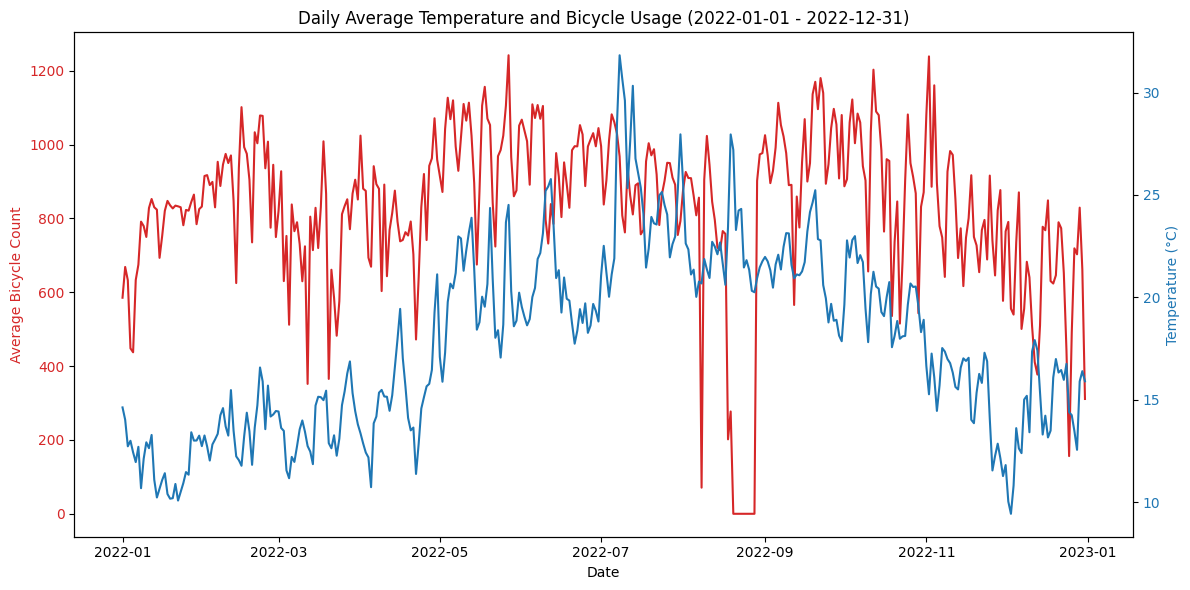

In [9]:
start_date = '2022-01-01'
end_date = '2022-12-31'

# Filtrar os dados de meteorologia para o intervalo de datas
df_meterology_filtered = df_meterology[(df_meterology['datetime'] >= start_date) & (df_meterology['datetime'] <= end_date)]
df_meterology_filtered['date'] = df_meterology_filtered['datetime'].dt.date  # Converter datetime para apenas data

# Filtrar os dados de contagem de bicicletas para o intervalo de datas
df_bicycle_filtered = df_bicycle[(df_bicycle.index >= start_date) & (df_bicycle.index <= end_date)]
df_bicycle_filtered['date'] = df_bicycle_filtered.index.date  # Converter datetime para apenas data

# Calcular a média diária da temperatura
df_temp_daily = df_meterology_filtered.groupby('date')['temp'].mean()

# Calcular a média diária da contagem de bicicletas (soma de todas as colunas count_)
count_columns = [col for col in df_bicycle_filtered.columns if 'count_' in col]
df_bicycle_filtered['total_count'] = df_bicycle_filtered[count_columns].sum(axis=1)  # Soma de todos os contadores
df_bike_daily = df_bicycle_filtered.groupby('date')['total_count'].mean()  # Média diária das contagens

# Criar gráfico com 2 eixos Y
fig, ax1 = plt.subplots(figsize=(12, 6))

# temperatura com linha azul
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Bicycle Count', color='tab:red')
ax1.plot(df_bike_daily.index, df_bike_daily, color='tab:red', label='Bicycle Count')
ax1.tick_params(axis='y', labelcolor='tab:red')


# Criar segundo eixo Y para as bicicletas
ax2 = ax1.twinx()
ax2.set_ylabel('Temperature (°C)', color='tab:blue')
ax2.plot(df_temp_daily.index, df_temp_daily, color='tab:blue', label='Temperature')
ax2.tick_params(axis='y', labelcolor='tab:blue')


plt.title(f'Daily Average Temperature and Bicycle Usage ({start_date} - {end_date})')
fig.tight_layout()
plt.show()





In [10]:
# Soma de todas as colunas que contém 'count_' no nome
df_bicycle['total_count'] = df_bicycle.filter(like='count_').sum(axis=1)

# Resample para calcular a soma diária
df_daily_bike = df_bicycle['total_count'].resample('D').sum()


In [11]:
# Definir a coluna datetime como índice
df_meterology.set_index('datetime', inplace=True)

# Agora o resample funcionará corretamente
df_temp_daily = df_meterology['temp'].resample('D').mean()


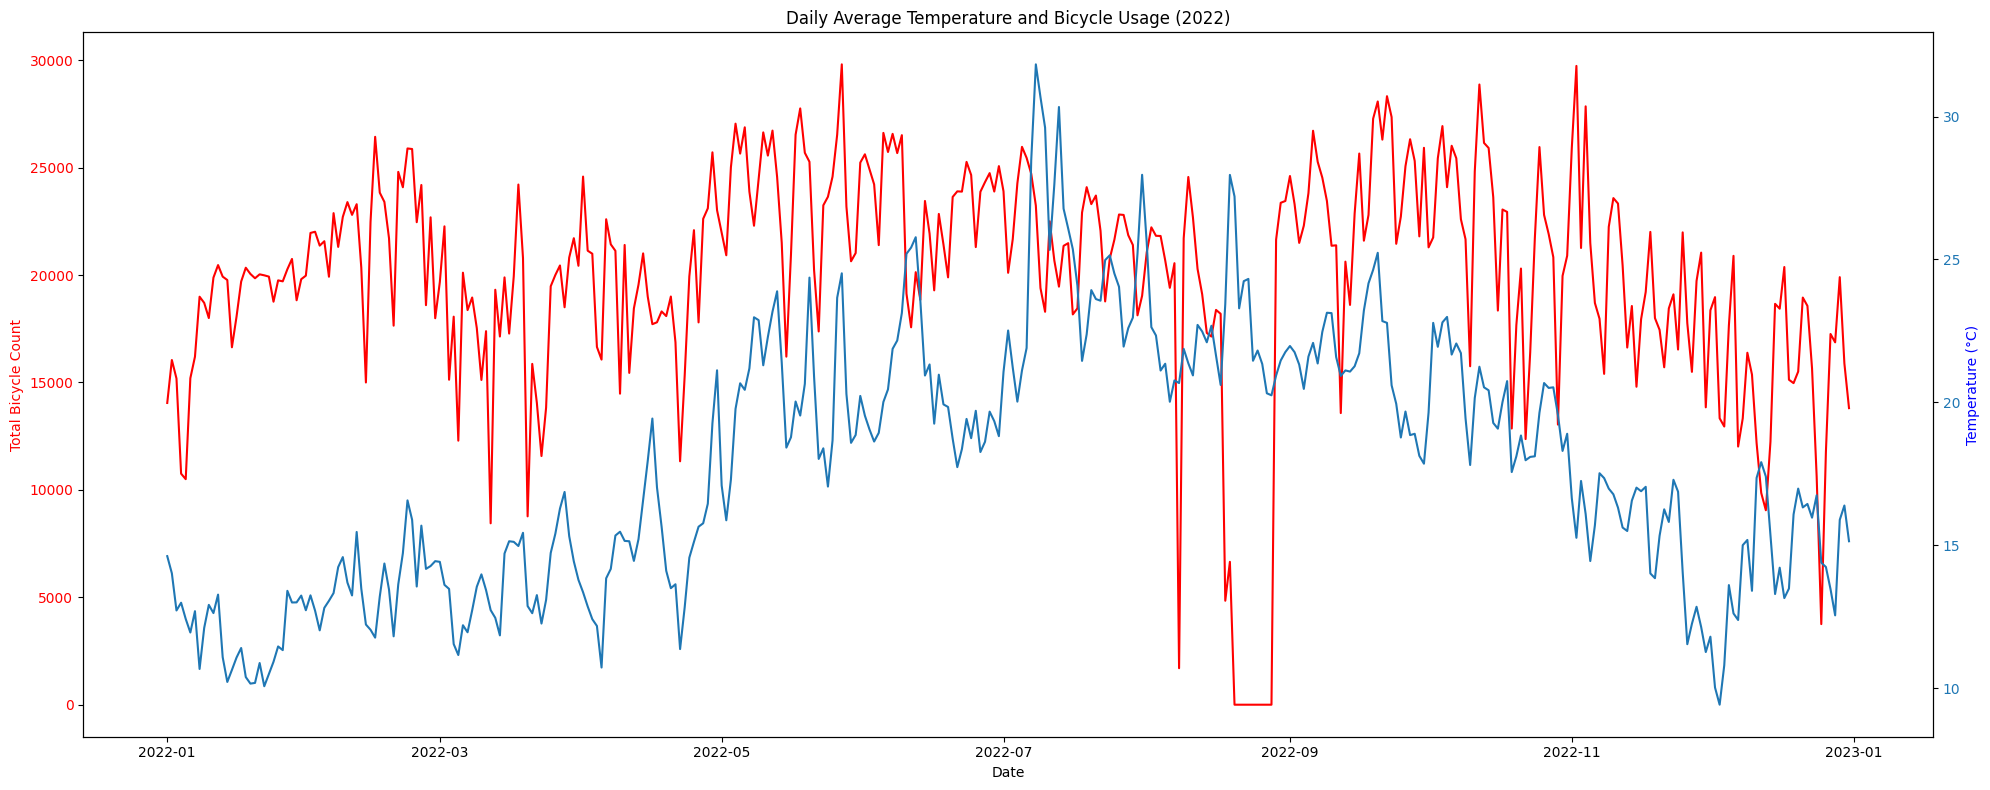

In [12]:
# Definir o ano desejado para o gráfico
specific_year = 2022  

# Filtrar os dados apenas na hora do gráfico
df_temp_year = df_temp_daily[df_temp_daily.index.year == specific_year]
df_bike_year = df_daily_bike[df_daily_bike.index.year == specific_year]

# Criar gráfico com 2 eixos Y
fig, ax1 = plt.subplots(figsize=(20, 8))

# Temperatura com linha azul
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Bicycle Count', color='red')
ax1.plot(df_bike_year, color='red', label='Bicycle Count')
ax1.tick_params(axis='y', labelcolor='red')

# Criar segundo eixo Y para as bicicletas
ax2 = ax1.twinx()
ax2.set_ylabel('Temperature (°C)', color='blue')
ax2.plot( df_temp_year, color='tab:blue', label='Temperature')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Adicionar título e legenda
plt.title(f'Daily Average Temperature and Bicycle Usage ({specific_year})')
fig.tight_layout()
plt.show()


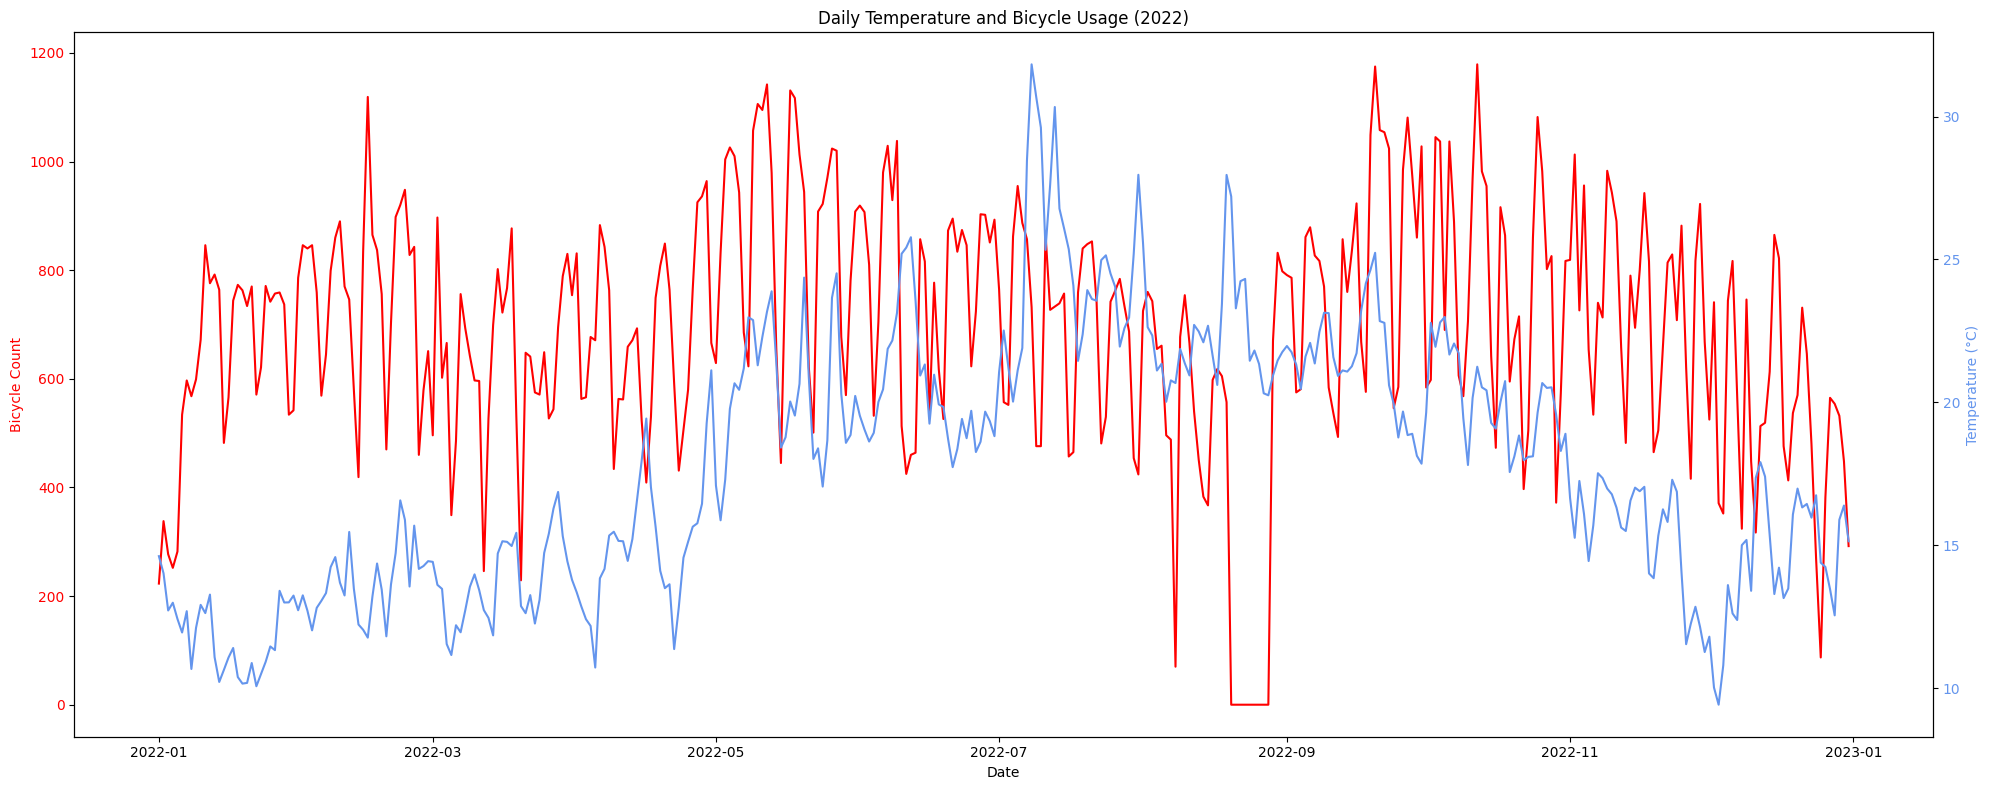

In [32]:
# Variáveis de configuração
specific_year = 2022  
contador_especifico = 'count_5'  # Nome do contador específico

# Garantir que os índices estão como DatetimeIndex
df_bicycle.index = pd.to_datetime(df_bicycle.index)
df_meterology.index = pd.to_datetime(df_meterology.index)

# Filtrar os dados apenas para o contador específico
if contador_especifico in df_bicycle.columns:
    df_bicycle['selected_count'] = df_bicycle[contador_especifico]  # Seleciona a coluna do contador específico
else:
    raise ValueError(f"O contador '{contador_especifico}' não existe no conjunto de dados.")

# Resample para calcular a soma diária do contador específico
df_daily_bike = df_bicycle['selected_count'].resample('D').sum()
df_temp_daily = df_meterology['temp'].resample('D').mean()

# Filtrar apenas os dados do ano desejado
df_temp_year = df_temp_daily[df_temp_daily.index.year == specific_year]
df_bike_year = df_daily_bike[df_daily_bike.index.year == specific_year]

# Criar gráfico com 2 eixos Y
fig, ax1 = plt.subplots(figsize=(20, 8))

# Contagem de bicicletas com linha vermelha clara
ax1.set_xlabel('Date')
ax1.set_ylabel('Bicycle Count', color='red')
ax1.plot(df_bike_year, color='red', label='Bicycle Count')
ax1.tick_params(axis='y', labelcolor='red')

# Criar segundo eixo Y para temperatura
ax2 = ax1.twinx()
ax2.set_ylabel('Temperature (°C)', color='#6495ED')
ax2.plot(df_temp_year, color='#6495ED', label='Temperature')
ax2.tick_params(axis='y', labelcolor='#6495ED')

# Adicionar título e legenda
plt.title(f'Daily Temperature and Bicycle Usage ({specific_year})')
fig.tight_layout()
plt.show()


In [16]:
# Realizar o resample e calcular a média da temperatura
df_precip_daily = df_meterology['precip'].resample('D').sum()

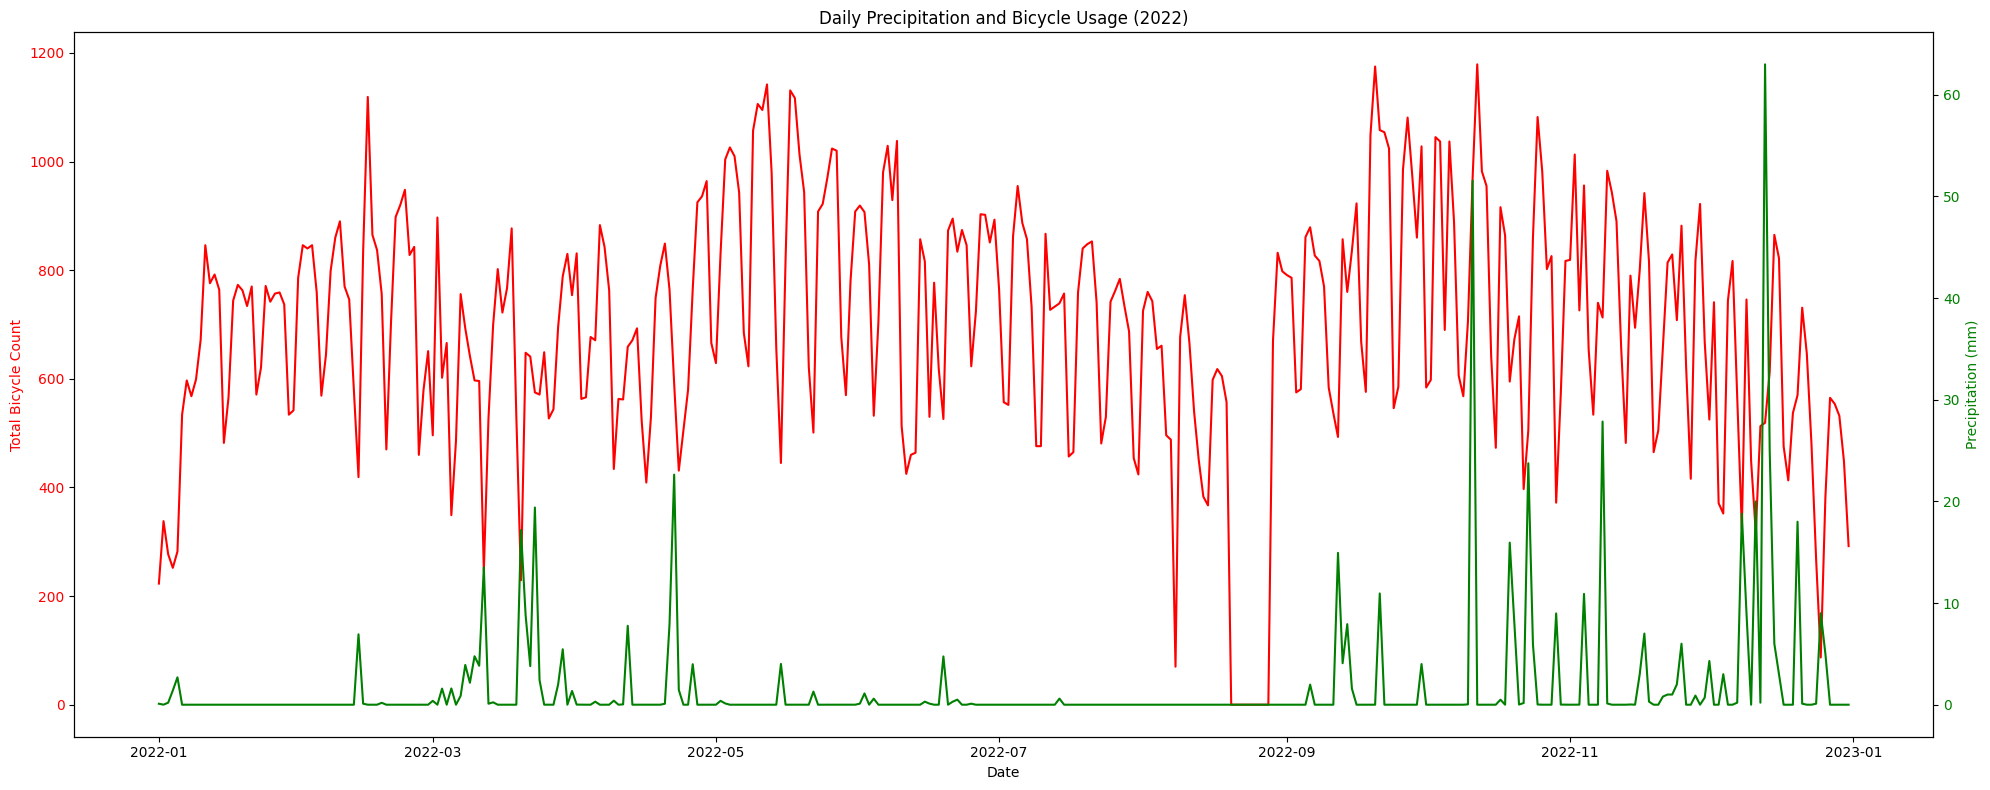

In [ ]:
# Definir o ano desejado para o gráfico
specific_year = 2022  

# Filtrar os dados apenas na hora do gráfico
df_precip_year = df_precip_daily[df_precip_daily.index.year == specific_year]
df_bike_year = df_daily_bike[df_daily_bike.index.year == specific_year]

# Criar gráfico com 2 eixos Y
fig, ax1 = plt.subplots(figsize=(20, 8))

# Temperatura com linha azul
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Bicycle Count', color='red')
ax1.plot(df_bike_year, color='red', label='Bicycle Count')
ax1.tick_params(axis='y', labelcolor='red')


# Criar segundo eixo Y para as bicicletas
ax2 = ax1.twinx()
ax2.set_ylabel('Precipitation (mm)', color='green')
ax2.plot( df_precip_year, color='green', label='Precipitation')
ax2.tick_params(axis='y', labelcolor='green')

# Adicionar título e legenda
plt.title(f'Daily Precipitation and Bicycle Usage ({specific_year})')
fig.tight_layout()
plt.show()


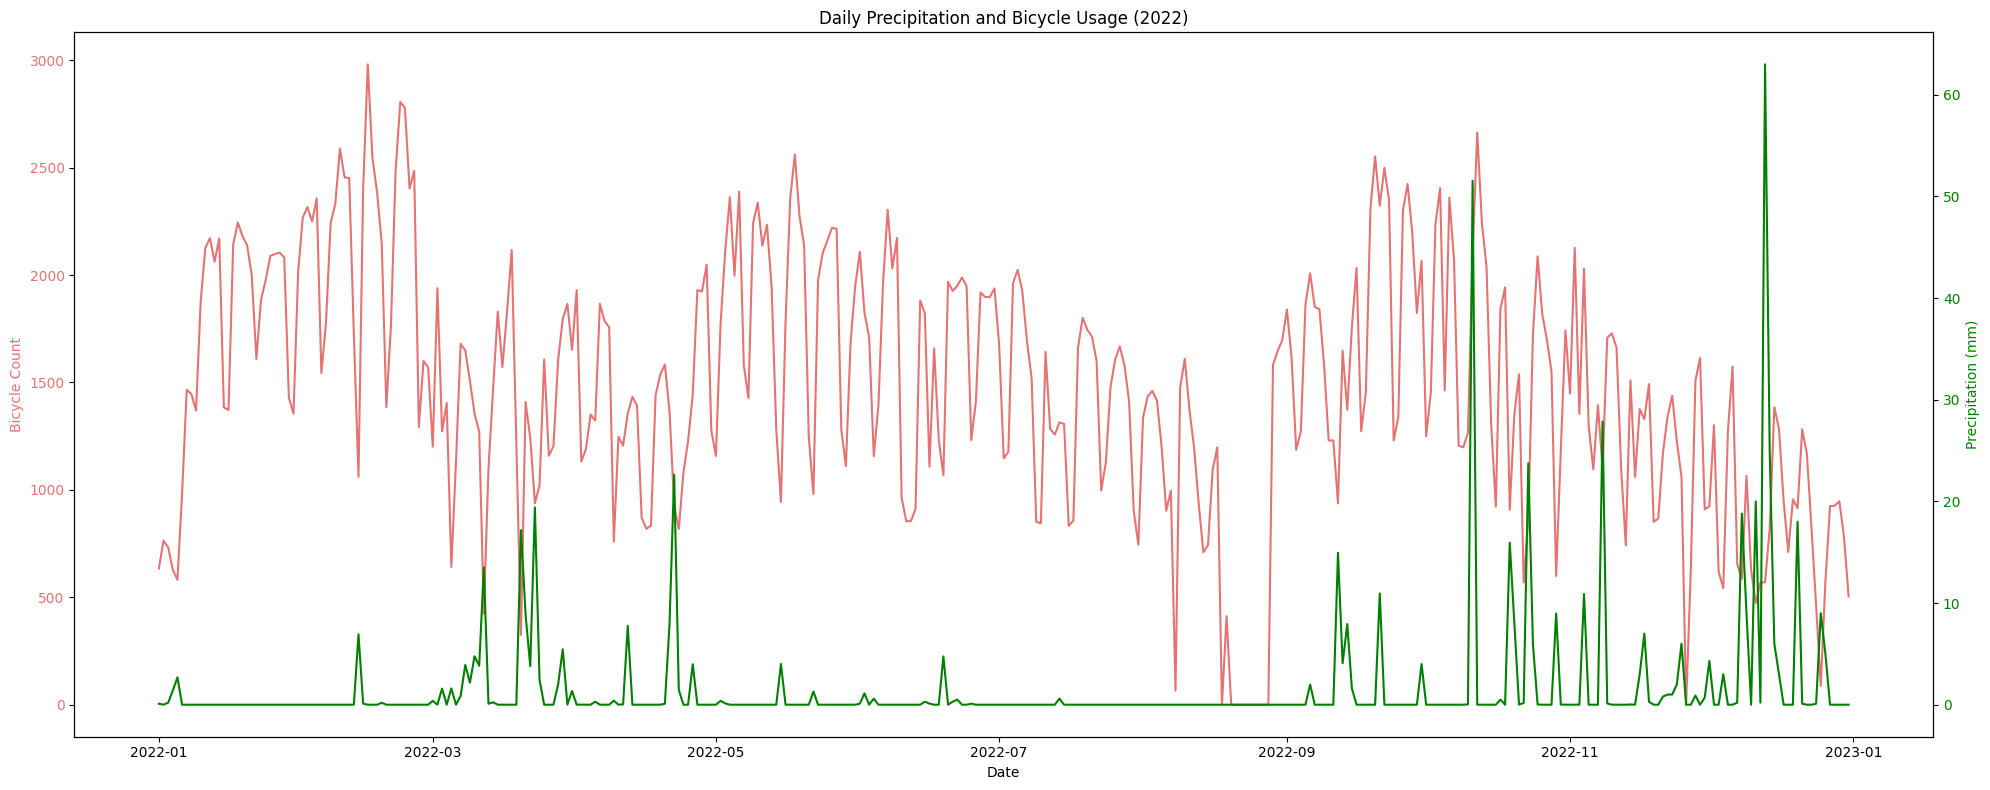

In [29]:
# Definir o ano desejado para o gráfico
specific_year = 2022  
contador_especifico = 'count_6'

# Filtrar os dados apenas na hora do gráfico
df_precip_year = df_precip_daily[df_precip_daily.index.year == specific_year]
df_bike_year = df_daily_bike[df_daily_bike.index.year == specific_year]

# Filtrar os dados apenas para o contador específico
if contador_especifico in df_bicycle.columns:
    df_bicycle['selected_count'] = df_bicycle[contador_especifico]  # Seleciona a coluna do contador específico
else:
    raise ValueError(f"O contador '{contador_especifico}' não existe no conjunto de dados.")

# Resample para calcular a soma diária do contador específico
df_daily_bike = df_bicycle['selected_count'].resample('D').sum()

# Criar gráfico com 2 eixos Y
fig, ax1 = plt.subplots(figsize=(20, 8))

# Temperatura com linha azul
ax1.set_xlabel('Date')
ax1.set_ylabel('Bicycle Count', color='#E57373')
ax1.plot(df_bike_year, color='#E57373', label='Bicycle Count')
ax1.tick_params(axis='y', labelcolor='#E57373')

# Criar segundo eixo Y para as bicicletas
ax2 = ax1.twinx()
ax2.set_ylabel('Precipitation (mm)', color='green')
ax2.plot( df_precip_year, color='green', label='Precipitation')
ax2.tick_params(axis='y', labelcolor='green')

# Adicionar título e legenda
plt.title(f'Daily Precipitation and Bicycle Usage ({specific_year})')
fig.tight_layout()
plt.show()


In [ ]:
# Definir o ano de interesse (exemplo: 2022)
start_date = '2022-01-01'
end_date = '2022-12-31'

# Filtrar os dados de contagem de bicicletas para o ano de 2022
df_bicycle_filtered = df_bicycle[(df_bicycle.index >= start_date) & (df_bicycle.index <= end_date)]

# Seleciona as colunas de contagem de bicicletas (por exemplo: 'count_2', 'count_3', ...)
count_columns = [col for col in df_bicycle_filtered.columns if 'count_' in col]

# Resample para a contagem de bicicletas, somando as colunas de contagem por dia
df_daily_bike = df_bicycle_filtered[count_columns].resample('D').sum().sum(axis=1)

# Filtrar os dados de meteorologia para o ano de 2022
df_meterology_filtered = df_meterology[(df_meterology.index >= start_date) & (df_meterology.index <= end_date)]

# Resample para a temperatura e calcular a média diária
df_temp_daily = df_meterology_filtered['temp'].resample('D').mean()

# Resample para a precipitação e calcular a soma diária
df_daily_precip = df_meterology_filtered['precip'].resample('D').sum()

In [ ]:

# Criar figura e eixo principal
fig, ax = plt.subplots(figsize=(20, 8))
fig.subplots_adjust(right=0.75)

# Criar eixos adicionais
twin1 = ax.twinx()  # Eixo para temperatura
twin2 = ax.twinx()  # Eixo para precipitação

# Offset para o eixo twin2 para evitar sobreposição
twin2.spines['right'].set_position(('axes', 1.1))

# Plot da temperatura (usando df_temp_daily_2022 com resample e mean)
p1, = ax.plot(df_temp_daily.index, df_temp_daily, color="tab:blue", label="Temperature")
# Plot da precipitação (usando df_daily_precip_2022 com resample e sum)
p2, = twin1.plot(df_daily_precip.index, df_daily_precip, color="tab:green", label="Precipitation")
# Plot da contagem de bicicletas (usando df_daily_bike_2022 com resample e sum)
p3, = twin2.plot(df_daily_bike.index, df_daily_bike, color="tab:red", label="Bicycle Count")

# Definir limites e rótulos para os eixos
ax.set(xlabel="Date", ylabel="Temperature (°C)", ylim=(df_temp_daily.min(), df_temp_daily.max()))
twin1.set(ylabel="Precipitation (mm)", ylim=(df_daily_precip.min(), df_daily_precip.max()))
twin2.set(ylabel="Bicycle Count", ylim=(df_daily_bike.min(), df_daily_bike.max()))

# Ajustar a cor dos rótulos de eixo para corresponder à cor da linha
ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())

# Ajustar as cores dos ticks de cada eixo
ax.tick_params(axis='y', colors=p1.get_color())
twin1.tick_params(axis='y', colors=p2.get_color())
twin2.tick_params(axis='y', colors=p3.get_color())

# Adicionar a legenda
ax.legend(handles=[p1, p2, p3])

# Exibir o gráfico
plt.title('Temperature, Precipitation, and Bicycle Count in 2022')
plt.tight_layout()
plt.show()
